# AC209b - Final Project - Milestone 2

### Project: Microbiome

Group Members: Dylan Randle, Joe Davison, Robbert Struyven, Simon Sebbagh

Everyone in our group has been in contact with one another and we have sent an initial introductory email to our TF.

### Preliminary EDA

In [0]:
import pickle

In [0]:
with open('mouse_set_1_data.pkl', 'rb') as f:
    mouse_1 = pickle.load(f)

with open('mouse_set_2_data.pkl', 'rb') as f:
    mouse_2 = pickle.load(f)

In [0]:
mouse_1.keys(), mouse_2.keys()

(dict_keys(['reads', 'qpcr', 'times', 'otu_taxonomy']),
 dict_keys(['reads', 'qpcr', 'times', 'otu_taxonomy']))

We have "reads", "qpcr", "times" and "otu_taxonomy".

In [0]:
mouse_1['reads'].keys(), mouse_2['reads'].keys()

(dict_keys(['2', '3', '4', '5']), dict_keys(['10', '6', '7', '8', '9']))

Mice 2-5 are in `mouse_1` whereas Mice 6-10 are in `mouse_2`

In [0]:
import pandas as pd

In [0]:
print('reads shape: {}'.format(mouse_1['reads']['2'].shape))
print(mouse_1['reads']['2'].head(5))

reads shape: (202, 75)
        0AM   0PM   1AM   1PM   2AM   2PM   3AM   3PM    4AM    4PM  ...  \
OTU_1  1094  3292  1744   193   468   974  1323  2854   7106   3949  ...   
OTU_2   180   825  1340  4501  9959  5564  2738  3069   2318   1229  ...   
OTU_3    10     8    10    27   117    28    44    50     77     49  ...   
OTU_4     3     0     9    32   205   254   196   361   1073    871  ...   
OTU_5     6    13   195   517   744  4703  5620  8592  11602  11978  ...   

       58PM  59AM  59PM  60AM  60PM     61     62    63  64AM  64PM  
OTU_1  3297  1415  1539  1641  6409   1477   1108   573   841   762  
OTU_2   100    25     0    80  5359     86    398   447  1265  1326  
OTU_3    10     6     3    20    15     26     11     4     7    24  
OTU_4  7318  6252  8405  9322  9061  12263  10940  6070  9832  8101  
OTU_5     1     0     0     0     4      1      1     8     1     0  

[5 rows x 75 columns]


In [0]:
def get_mouse_data(mouse_num, column):
    """ helper function to get mouse data """
    if mouse_num <= 5:
        # dict 1
        if column in['reads','qpcr']:
            return mouse_1[column][str(mouse_num)]
        else:
            return mouse_1[column]
    else:
        # dict 2
        if column in['reads','qpcr']:
            return mouse_2[column][str(mouse_num)]
        else:
            return mouse_2[column]

In [0]:
get_mouse_data(2, 'reads').head()

,0AM,0PM,1AM,1PM,2AM,2PM,3AM,3PM,4AM,4PM,...,58PM,59AM,59PM,60AM,60PM,61,62,63,64AM,64PM
OTU_1,1094,3292,1744,193,468,974,1323,2854,7106,3949,...,3297,1415,1539,1641,6409,1477,1108,573,841,762
OTU_2,180,825,1340,4501,9959,5564,2738,3069,2318,1229,...,100,25,0,80,5359,86,398,447,1265,1326
OTU_3,10,8,10,27,117,28,44,50,77,49,...,10,6,3,20,15,26,11,4,7,24
OTU_4,3,0,9,32,205,254,196,361,1073,871,...,7318,6252,8405,9322,9061,12263,10940,6070,9832,8101
OTU_5,6,13,195,517,744,4703,5620,8592,11602,11978,...,1,0,0,0,4,1,1,8,1,0


In [0]:
get_mouse_data(6, 'reads').head()

,0AM,1AM,1PM,2AM,2PM,3AM,3PM,4AM,4PM,5,...,58PM,59AM,59PM,60AM,60PM,61,62,63,64AM,64PM
OTU_1,1048,33476,26834,22014,16204,16028,31380,11226,14789,16566,...,19978,25303,13110,34878,30946,21687,25350,16198,8813,5041
OTU_2,1140,4714,7081,9512,8408,9939,20607,9503,11822,13296,...,12025,6099,9515,1303,9133,13875,1624,8087,8362,10075
OTU_3,37,18,52,5232,11070,15833,21400,16949,16776,12645,...,13,14,11,2,19,43,13,20,12,2
OTU_4,77,0,8,4,0,0,8,3,0,12,...,339,26,63,59,15,68,31,16,29,37
OTU_5,93,10,4,35,8,20,15,11,7,15,...,0,0,0,2,0,2,5,3,9,6


In [0]:
get_mouse_data(2, 'qpcr').head()

,mean,std
0AM,8.724134e+06,6.029776e+05
0PM,3.674454e+07,1.388925e+07
1AM,2.554379e+11,9.572197e+10
1PM,8.266330e+09,2.948702e+09
2AM,8.107457e+09,4.296630e+09


In [0]:
get_mouse_data(6, 'qpcr').head()

,mean,std
0AM,1.176631e+07,5.227645e+06
1AM,6.516426e+09,1.732993e+09
1PM,1.648246e+09,4.931391e+08
2AM,3.589292e+10,1.755669e+09
2PM,2.208925e+10,5.643835e+09


QPCR holds mean and std info (assuming related to total reads).

In [0]:
for m in range(2,11):
  print('\n===========')
  print('Mouse {}'.format(m))
  for c in ['reads', 'qpcr']:
      temp = get_mouse_data(m, c)
      print('Shape of {}: {}'.format(c, temp.shape))


Mouse 2
Shape of reads: (202, 75)
Shape of qpcr: (75, 2)

Mouse 3
Shape of reads: (202, 75)
Shape of qpcr: (75, 2)

Mouse 4
Shape of reads: (202, 75)
Shape of qpcr: (75, 2)

Mouse 5
Shape of reads: (202, 75)
Shape of qpcr: (75, 2)

Mouse 6
Shape of reads: (176, 73)
Shape of qpcr: (73, 2)

Mouse 7
Shape of reads: (176, 73)
Shape of qpcr: (73, 2)

Mouse 8
Shape of reads: (176, 73)
Shape of qpcr: (73, 2)

Mouse 9
Shape of reads: (176, 73)
Shape of qpcr: (73, 2)

Mouse 10
Shape of reads: (176, 73)
Shape of qpcr: (73, 2)


In [0]:
print('Num times mouse 1: {}'.format(len(mouse_1['times'])))
mouse_1['times'][0:10] # just a list

Num times mouse 1: 75


[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

In [0]:
print('Num times mouse 2: {}'.format(len(mouse_2['times'])))
mouse_2['times'][0:10]

Num times mouse 2: 73


[0.0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

Note: The `times` are slightly different.

In [0]:
print('Mouse 1 OTU Taxonomy shape: {}'.format(mouse_1['otu_taxonomy'].shape))
mouse_1['otu_taxonomy'].head()

Mouse 1 OTU Taxonomy shape: (202, 7)


,sequence,Kingdom,Phylum,Class,Order,Family,Genus
otuName,,,,,,,
OTU_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
OTU_2,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
OTU_3,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Akkermansia
OTU_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
OTU_5,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Akkermansia


In [0]:
print('Mouse 2 OTU Taxonomy shape: {}'.format(mouse_2['otu_taxonomy'].shape))
mouse_2['otu_taxonomy'].head()

Mouse 2 OTU Taxonomy shape: (176, 7)


,sequence,Kingdom,Phylum,Class,Order,Family,Genus
otuName,,,,,,,
OTU_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
OTU_2,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
OTU_3,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Akkermansia
OTU_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
OTU_5,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Akkermansia


`otu_taxonomy` holds dataframes that map the `otuName` to various info about the bug.

In [0]:
mouse2_reads=get_mouse_data(2,'reads')

In [0]:
mouse2_reads.head()

,0AM,0PM,1AM,1PM,2AM,2PM,3AM,3PM,4AM,4PM,...,58PM,59AM,59PM,60AM,60PM,61,62,63,64AM,64PM
OTU_1,1094,3292,1744,193,468,974,1323,2854,7106,3949,...,3297,1415,1539,1641,6409,1477,1108,573,841,762
OTU_2,180,825,1340,4501,9959,5564,2738,3069,2318,1229,...,100,25,0,80,5359,86,398,447,1265,1326
OTU_3,10,8,10,27,117,28,44,50,77,49,...,10,6,3,20,15,26,11,4,7,24
OTU_4,3,0,9,32,205,254,196,361,1073,871,...,7318,6252,8405,9322,9061,12263,10940,6070,9832,8101
OTU_5,6,13,195,517,744,4703,5620,8592,11602,11978,...,1,0,0,0,4,1,1,8,1,0


In [0]:
mouse2_reads.head().values[0]

array([ 1094,  3292,  1744,   193,   468,   974,  1323,  2854,  7106,
        3949,  5213,  5815,  9310,  2502,   215,  1114,  1634,  7921,
        9532,  3113,  3417,  5109,  3772,  3806,  1943,   761,  2260,
        1329,   975,  3276,  3672,  4837,  5395,  6865,  5596, 10241,
        2643,  2448,  2214,  1453,  1157,   257,   113,   101,  1678,
        2514,   111,   187,   190,   192,    87,    49,   183,   158,
          54,    49,    29,    48,   159,    40,   188,  1948,  4685,
        2816,  3252,  3297,  1415,  1539,  1641,  6409,  1477,  1108,
         573,   841,   762])

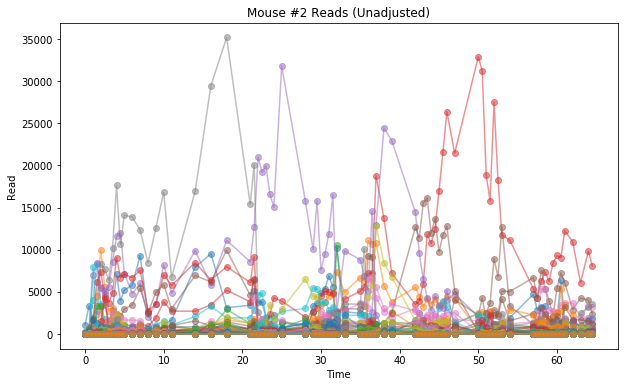

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
times_ = mouse_1['times']
plt.figure(figsize=(10,6))
for idx,row in mouse2_reads.iterrows():
  plt.plot(times_, row.values, '-o', alpha=0.5)
plt.title('Mouse #2 Reads (Unadjusted)')
plt.xlabel('Time')
plt.ylabel('Read');

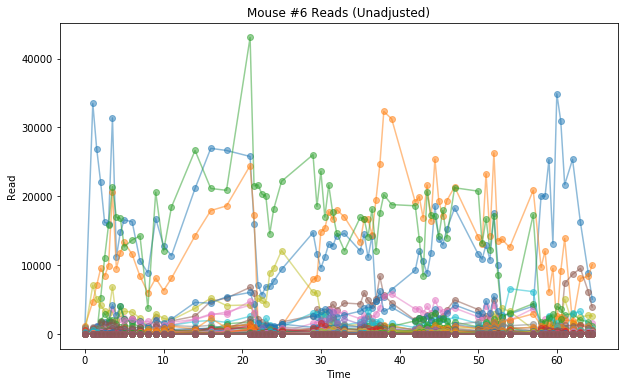

In [0]:
mouse6_reads = get_mouse_data(6, 'reads')
times_ = get_mouse_data(6, 'times')
plt.figure(figsize=(10,6))
for idx,row in mouse6_reads.iterrows():
  plt.plot(times_, row.values, '-o', alpha=0.5)
plt.title('Mouse #6 Reads (Unadjusted)')
plt.xlabel('Time')
plt.ylabel('Read');

In [0]:
## adjusting the reads
mouse2_qpcr = get_mouse_data(2, 'qpcr')
mouse2_qpcr.shape, mouse2_reads.shape

((75, 2), (202, 75))

In [0]:
display(mouse2_qpcr.head(2))
display(mouse2_reads.head(2))

,mean,std
0AM,8.724134e+06,6.029776e+05
0PM,3.674454e+07,1.388925e+07


,0AM,0PM,1AM,1PM,2AM,2PM,3AM,3PM,4AM,4PM,...,58PM,59AM,59PM,60AM,60PM,61,62,63,64AM,64PM
OTU_1,1094,3292,1744,193,468,974,1323,2854,7106,3949,...,3297,1415,1539,1641,6409,1477,1108,573,841,762
OTU_2,180,825,1340,4501,9959,5564,2738,3069,2318,1229,...,100,25,0,80,5359,86,398,447,1265,1326


In [0]:
import numpy as np
np.sum(mouse2_reads.values[:,0]), mouse2_qpcr.values[0,0]

(2929, 8724133.557309365)

####  Remarks:

All of the data seems to make sense. All of the dimensions line up. The most important thing to note is that `mouse_1` and `mouse_2` are fundamentally different experiments, taken from the same lab. That's why we have different `reads` dataframe shapes of `(202,75)` and `(176,73)` respectively. We really can't group these two together without taking this additional information into consideration.

One important point that was mentioned in the lecture is that the `reads` data is not quantitative, and only relatively relevant. To make across-time inferences legitimate, we must multiply the relative abundance by the total (found in `qpcr`).

### Project Statement

We will employ Bayesian machine learning methods (e.g. hierarchical models, gaussian processes) in an attempt to do inference and make predictions on the dynamics of the system. Specifically, we are interested in being able to predict the effect that a given intervention will have. We will model all of this in the Bayesian framework, utilizing the `qpcr` as given uncertainty estimate for our priors. We will then be able to make predictions with our model (through the posterior predictive) that come with principled uncertainty estimates.

Additionally, we will be able to inject our prior information into the model. For example, perhaps we can employ hierarchical modeling to allow parameter sharing between `mouse_1` and `mouse_2`. 

### Literature Review and References 
 1. Microbiome dynamics and temporal genetic data analysis
 2. Microbiome and the origin of IBD [link](https://en.wikipedia.org/wiki/Inflammatory_bowel_disease#Microbiota)
 3. Microbiome and the treatment of IBD [link ](https://en.wikipedia.org/wiki/Inflammatory_bowel_disease#Microbiome)

----

#### 1. Microbiome dynamics and temporal genetic data analysis

*  **Many pitfalls in the microbiome analysis of temporal genetic data:** “The human gut microbiota is a very complex and dynamic ecosystem that plays a crucial role in health and well-being. Inferring microbial community structure and dynamics directly from time-resolved metagenomics data is key to understanding the community ecology and predicting its temporal behavior. Many methods have been proposed to perform the inference. Yet, as we point out in this review, there are several pitfalls along the way.
 -	Indeed, the uninformative temporal measurements and the compositional nature of the relative abundance data raise serious challenges in inference. 
 -	Moreover, the inference results can be largely distorted when only focusing on highly abundant species by ignoring or grouping low-abundance species. 
 -	Finally, the implicit assumptions in various regularization methods may not reflect reality. Those issues have to be seriously considered in ecological modeling of human gut microbiota.”
    - *REF: Cao HT, Gibson TE, Bashan A, Liu YY (February 2017). “Inferring human microbial dynamics from temporal metagenomics data: Pitfalls and lessons.” Bioessays. 2017 Feb;39(2). doi: 10.1002/bies.201600188. PMID: 28000336*

* **Longitudinal Prediction of the Infant Gut Microbiome with Dynamic Bayesian Networks:**  "Dynamic Bayesian Newtorks (DBNs) were able to identify important relationships between microbiome taxa and predict future changes in microbiome composition from measured or synthetic initial conditions. DBNs also provided likelihood estimates for sudden, dramatic shifts in microbiome composition, which may be useful in guiding further analysis of those samples."
    - *REF: McGeachie MJ, Sordillo JE, Gibson T, Weinstock GM, Liu YY, Gold DR, Weiss ST, Litonjua A. "Longitudinal Prediction of the Infant Gut Microbiome with Dynamic Bayesian Networks" (February 2016) Sci Rep. 2016 Feb 8;6:20359. doi: 10.1038/srep20359. PMID: 26853461*
    
* **Robust and Scalable Models of Microbiome Dynamics by specifying microbial interaction:**  "A new type of dynamical systems model for microbial dynamics based on what we term interaction modules, or learned clusters of latent variables with redundant interaction structure (reducing the expected number of interaction coefficients from O(n2) to O((logn)2)); a fully Bayesian formulation of the stochastic dynamical systems model that propagates measurement and latent state uncertainty throughout the model; and introduction of a temporally varying auxiliary variable technique to enable efficient inference by relaxing the hard non-negativity constraint on states."
    - *REF: Travis E. Gibson, Georg K. Gerber "Robust and Scalable Models of Microbiome Dynamics" (Submitted on 11 May 2018 (v1), last revised 8 Jun 2018 (this version, v2))*
    
* **Universality of gut microbial dynamics: after faecal microbiota transplantation we observe the same microbioal dynamics in different subjects:** “Notably, the universality of gut microbial dynamics is not observed in subjects with recurrent Clostridium difficile infection but is observed in the same set of subjects after faecal microbiota transplantation. These results fundamentally improve our understanding of the processes that shape human microbial ecosystems, and pave the way to designing general microbiome-based therapies.”
    - *REF: Bashan A, Gibson TE, Friedman J, Carey VJ, Weiss ST, Hohmann EL, Liu YY. (January 2016) “Universality of human microbial dynamics.” Nature. 2016 Jun 9;534(7606):259-62. doi: 10.1038/nature18301. PMID: 27279224*

* **Antibiotic effects on gut microbiota and metabolism are host dependent:** “Interactions of diet, gut microbiota, and host genetics play important roles in the development of obesity and insulin resistance.  Thus, changes in bile acid and inflammatory signaling, insulin resistance, and glucose metabolism driven by an HFD can be modified by antibiotic-induced changes in gut microbiota; however, these effects depend on important interactions with the host's genetic background and inflammatory potential.”
    - *REF: Fujisaka S, Ussar S, Clish C, Devkota S, Dreyfuss JM, Sakaguchi M, Soto M, Konishi M, Softic S, Altindis E, Li N, Gerber G, Bry L, Kahn CR. (December 2016) “Antibiotic effects on gut microbiota and metabolism are host dependent.” J Clin Invest. 2016 Dec 1;126(12):4430-4443. doi: 10.1172/JCI86674. PMID: 27775551*

----

#### 2. Interesting references regarding microbiome and the etiology (cause/origin) of IBD [link](https://en.wikipedia.org/wiki/Inflammatory_bowel_disease#Microbiota)

* **Alterations in the gut microbiome may contribute to inflammatory gut diseases** as a result of microbial symbiosis and immunity, 
    - *REF: Mukhopadhya I, Hansen R, El-Omar EM, Hold GL (February 2012). "IBD-what role do Proteobacteria play?". Nature Reviews. Gastroenterology & Hepatology. 9 (4): 219–30. doi:10.1038/nrgastro.2012.14. PMID 22349170.*


* **IBD-affected individuals have been found to have 30–50 percent reduced biodiversity of commensal bacteria,** such as decreases in Firmicutes (namely Lachnospiraceae) and Bacteroidetes.
    - *REF: Leitner GC, Vogelsang H. Pharmacological- and non-pharmacological therapeutic approaches in inflammatory bowel disease in adults. World J Gastrointest Pharmacol Ther. 2016;7(1):5–20. doi:10.4292/wjgpt.v7.i1.5 PMID: 26855808*
    - *REF: Devkota S, Wang Y, Musch MW, Leone V, Fehlner-Peach H, Nadimpalli A, Antonopoulos DA, Jabri B, Chang EB. (2012 June) Dietary-fat-induced taurocholic acid promotes pathobiont expansion and colitis in Il10-/- mice. Nature. 5;487(7405):104-8. doi: 10.1038/nature11225. PMID: 22722865*

* **IBD-affected individuals are more likely to have been prescribed antibiotics in the 2–5 year period before their diagnosis than unaffected individuals.** 
    - *REF: Aroniadis OC, Brandt LJ (January 2013). "Fecal microbiota transplantation: past, present and future". Current Opinion in Gastroenterology. 29 (1): 79–84. doi:10.1097/ MOG.0b013e32835a4b3e. PMID 23041678.*


----

#### 3. Interesting references regarding (change in low- or high-fat diet, antibiotics or fecal microbiota transplant) relating microbiome with treatment of IBD [link ](https://en.wikipedia.org/wiki/Inflammatory_bowel_disease#Microbiome)

* **The enteral bacteria can be altered by environmental factors**, such as concentrated milk fats (a common ingredient of processed foods and confectionery) or oral medications such as antibiotics and oral iron preparations.
    - *REF: Kotanko P, Carter M, Levin NW (August 2006). "Intestinal bacterial microflora--a potential source of chronic inflammation in patients with chronic kidney disease". Nephrology, Dialysis, Transplantation. 21 (8): 2057–60. doi:10.1093/ndt/gfl281. PMID 16762961.*

* **Preliminary evidence of an infectious contribution to inflammatory bowel disease in some patients that may benefit from antibiotic therapy,** such as with rifaximin.
    - *REF: Lopetuso LR, Napoli M, Rizzatti G, Gasbarrini A (June 2018). "The intriguing role of Rifaximin in gut barrier chronic inflammation and in the treatment of Crohn's disease". Expert Opin Investig Drugs. 27 (6): 543–551. doi:10.1080/13543784.2018.1483333. PMID 29865875.*

* **Rifaximin could potentially be redefined as a gut environment modulator?** The evidence for a benefit of rifaximin is mostly limited to crohn’s disease with less convincing evidence supporting use in ulcerative colitis. Conclusion of the paper: “Accumulating evidence suggests that mechanisms of action of rifaximin in IBD may not be limited to direct bactericidal activity; therefore, rifaximin could potentially be redefined as a gut environment modulator.”
    - *REF: Sartor RB (January 2016). "Review article: the potential mechanisms of action of rifaximin in the management of inflammatory bowel diseases". Aliment. Pharmacol. Ther. 43 Suppl 1: 27–36. doi:10.1111/apt.13436. PMID 26618923.*

* **Fecal microbiota (FMT) transplant as a new treatment option for IBD?** The paper concludes: “This analysis suggests that FMT is a safe, but variably efficacious treatment for IBD. More randomized controlled trials are needed and should investigate frequency of FMT administration, donor selection and standardization of microbiome analysis.”
    - *REF: Colman RJ, Rubin DT (December 2014). "Fecal microbiota transplantation as therapy for inflammatory bowel disease: a systematic review and meta-analysis". Journal of Crohn's & Colitis. 8 (12): 1569–81. doi:10.1016/j.crohns.2014.08.006. PMC 4296742. PMID 25223604.*
    
---
